# SI370 FA 2017
## Class 5.2: Statistics: the final frontier

## October 4, 2017

Our final installment (maybe) of statistics, in which we investigate:

- Crosstabs
- Contingency Tables
- $\chi^2$
- Regression
- Residuals
- Outliers

## <font color="red">REMEMBER TO SUBMIT your Jupyter Notebook (to Lab 5.2) via Canvas before you leave class today!

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_context("notebook")  # make figures fit
from pylab import rcParams
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 19})
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = 7,4
from statsmodels.graphics.mosaicplot import mosaic
exec(open('useful.py').read())

# make the Pandas tables a little more readable

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Diagnostic Plots are Important
* Is our data truly independent?
* What is the distribution of our sample?
* Is our data normal?

## Remember the crosstab?

In [3]:
auto = pd.DataFrame({'color' : ['red', 'green', 'green', 'black'] * 6,
                   'make' : ['ford', 'toyota', 'dodge'] * 8,
                   'type' : ['suv', 'suv', 'suv', 'car', 'car', 'truck'] * 4})

In [4]:
auto.head()


color    make type
0    red    ford  suv
1  green  toyota  suv
2  green   dodge  suv
3  black    ford  car
4    red  toyota  car

In [5]:
ct = pd.crosstab(auto.color,auto.make)  # calculate the cross tab
ct  # counts in each cell

make   dodge  ford  toyota
color                     
black      2     2       2
green      4     4       4
red        2     2       2

## Let's load up a bit more data, and something that's a bit more meaningful...

In [6]:
titanic = pd.read_csv('titanic.csv')

# <font color="red">BEGIN Q1</font>
## <font color="red">Q1a: Get a random sample of 5 rows from the ```titanic``` DataFrame.  What do the columns ```passtype``` and ```status``` indicate?

In [8]:
# insert code here to sample 5 random rows from the titanic DataFrame
titanic.head(5)

passtype    age status   sex
0    third  child   dead  male
1    third  child   dead  male
2    third  child   dead  male
3    third  child   dead  male
4    third  child   dead  male

## <font color="red">Q1b: Generate a crosstab of ```passtype``` and ```status```.  Assign the result to the variable ```ct```

In [12]:
# insert code here to generate a crosstab of passtype and status, assign the result to ```ct```
ct = pd.crosstab(titanic.passtype,titanic.status)

## Is this "expected"?

In [13]:
ct

status    alive  dead
passtype             
crew        212   673
first       203   122
second      118   167
third       178   528

## Generate a DataFrame that looks like this:

![](samplect.png 'sample')

In [15]:
## Let's first add a "totals" column
ctExt = ct.copy()  # make a copy for backup
ctExt.sum(axis=1)  # calculate row-wise sum

passtype
crew      885
first     325
second    285
third     706
dtype: int64

In [16]:
# add the column
ctExt['total'] = ctExt.sum(axis=1)

In [17]:
ctExt

status    alive  dead  total
passtype                    
crew        212   673    885
first       203   122    325
second      118   167    285
third       178   528    706

In [18]:
# calculate columnwise sum
s = ctExt.sum(axis=0)
#s
# add a row
ctExt.loc['total']=s # NOTE TO SELF: it's interesting that you can add a row like this


In [19]:
ctExt
#ctExt.alive/ctExt.total

status    alive  dead  total
passtype                    
crew        212   673    885
first       203   122    325
second      118   167    285
third       178   528    706
total       711  1490   2201

In [21]:
# calculate percents for each column
alivePercent = np.round(ctExt.alive/ctExt.total * 100,decimals=2)
deadPercent = np.round(ctExt.dead/ctExt.total * 100,decimals=2)
totalPercent = np.round(ctExt.total/ctExt.total * 100,decimals=2)
# NOTE TO SELF: each of these generate a column of percents

In [22]:
# pretty print
detailCT = ctExt.copy()
detailCT.alive = ctExt.alive.astype('str') + " (" + alivePercent.astype('str') + "%)"
detailCT.dead = ctExt.dead.astype('str') + " (" + deadPercent.astype('str') + "%)"
detailCT.total = ctExt.total.astype('str') + " (" + totalPercent.astype('str') + "%)" 

In [23]:
detailCT

status           alive          dead          total
passtype                                           
crew      212 (23.95%)  673 (76.05%)   885 (100.0%)
first     203 (62.46%)  122 (37.54%)   325 (100.0%)
second     118 (41.4%)   167 (58.6%)   285 (100.0%)
third     178 (25.21%)  528 (74.79%)   706 (100.0%)
total      711 (32.3%)  1490 (67.7%)  2201 (100.0%)

## Group question: Is this what we would have expected?

That is, was the mortality rate of every group equal?

## <font color="red">Q1c: What should we expect in each cell?

Can you calculate it?


In [19]:
# fill in the correct numbers on the next two lines
expectedAlive = ???
expectedDead = ???

# <font color="red">END Q1</font>

In [24]:
ctExpected = ct.copy()
ctExpected.alive = expectedAlive
ctExpected.dead = expectedDead
ctExpected['total'] = ctExpected.sum(axis=1)
ctExpected.loc['total'] = ctExpected.sum(axis=0)
alivePercent = np.round(ctExpected.alive/ctExpected.total * 100,decimals=2)
deadPercent = np.round(ctExpected.dead/ctExpected.total * 100,decimals=2)
totalPercent = np.round(ctExpected.total/ctExpected.total * 100,decimals=2)
detailExp = ctExpected.copy()
detailExp.alive = ctExpected.alive.astype('str') + " (" + alivePercent.astype('str') + "%)"
detailExp.dead = ctExpected.dead.astype('str') + " (" + deadPercent.astype('str') + "%)"
detailExp.total = ctExpected.total.astype('str') + " (" + totalPercent.astype('str') + "%)"

NameError: name 'expectedAlive' is not defined

In [21]:
detailExp

status             alive             dead            total
passtype                                                  
crew       283.2 (32.0%)    601.8 (68.0%)   885.0 (100.0%)
first      104.0 (32.0%)    221.0 (68.0%)   325.0 (100.0%)
second      91.2 (32.0%)    193.8 (68.0%)   285.0 (100.0%)
third     225.92 (32.0%)   480.08 (68.0%)   706.0 (100.0%)
total     704.32 (32.0%)  1496.68 (68.0%)  2201.0 (100.0%)

In [25]:
detailCT

status           alive          dead          total
passtype                                           
crew      212 (23.95%)  673 (76.05%)   885 (100.0%)
first     203 (62.46%)  122 (37.54%)   325 (100.0%)
second     118 (41.4%)   167 (58.6%)   285 (100.0%)
third     178 (25.21%)  528 (74.79%)   706 (100.0%)
total      711 (32.3%)  1490 (67.7%)  2201 (100.0%)

## Table is giving us a hint

## Mosaic Plots

Graphical Crosstabs

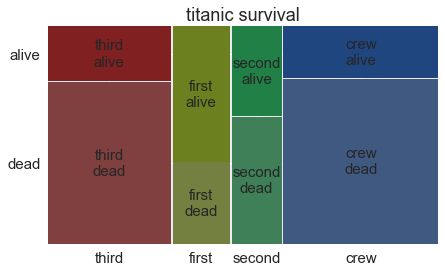

In [26]:
t = mosaic(titanic, ['passtype','status'],title='titanic survival')

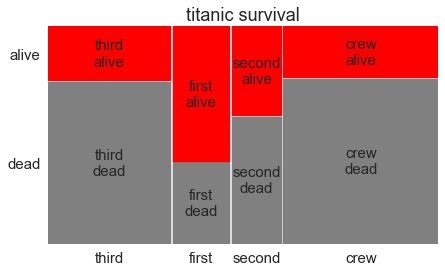

In [27]:
# slightly easier ot read
props = lambda key: {'color': 'r' if 'alive' in key else 'gray'}
t = mosaic(titanic, ['passtype','status'],title='titanic survival',properties=props)

In [28]:
# making the font a bit smaller
plt.rcParams.update({'font.size': 8})

## <font color="red">Q2: Extend the mosaic plot by including ```sex``` in the list of columns

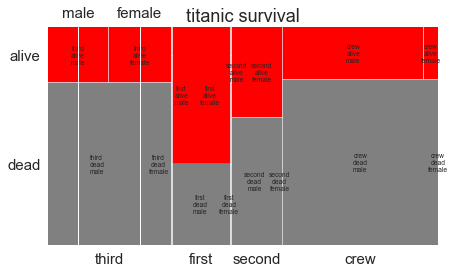

In [29]:
# copy the t = mosaic line from above and change it to include sex (in addition to passtype and status)
t = mosaic(titanic, ['passtype','status', 'sex'],title='titanic survival',properties=props)

# <font color="red">END Q2</font>

## $\chi^2$ Test

* The standard statistical test is $\chi^2$.
* To calculate we compare expected versus observed

For each cell in contingency table:

$$ \frac{({observed}-{expected})^2}{{expected}}$$


## $\chi^2$ Test

So if we expected 90, and saw 70, it would be:

$$ \frac{({observed}-{expected})^2}{{expected}} = \frac{(70-90)^2}{90} = \frac{400}{90} = 4.44$$

## $\chi^2$ Test (Pearson Statistic)

Calculate (sum) over all cells

$$ \sum_i{\frac{({observed}_i-{expected}_i)^2}{{expected}_i}}$$

In [30]:
# find observed and expected
observed = ct.copy()
expected = ct.copy()
expected['alive'] = ctExt.total * .33
expected['dead'] = ctExt.total * .67

In [28]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  190.401103617
p-val =  4.99992752987e-41
degree of freedom =  3
Expected:


0           1
0  285.885961  599.114039
1  104.986370  220.013630
2   92.064970  192.935030
3  228.062699  477.937301

## <font color="red">Q3: Based on the above results, do the number of deaths in the different passenger types differ significantly? 

<font color="red">
Yes, greatly!</font>

## $\chi^2$ variants

Number of $\chi^2$ variants
Depending on underlying assumptions (normality, indpendence, etc.)
* all have a similar flavor... 
* compare observed to expected

## Regression

What's the model?

Today: OLS (ordinary least squares)

In [31]:
dunbar = pd.read_csv('sim_dunbar.csv')

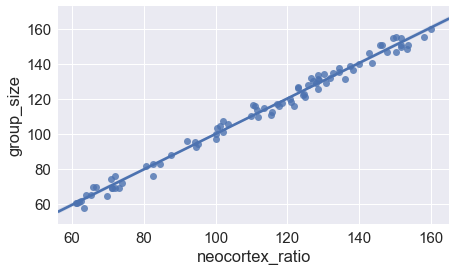

In [32]:
sns.regplot(data=dunbar,x='neocortex_ratio',y='group_size')

## In preparation for some later work, copy your ```writing``` data set from the previous class into this notebook

In [33]:
writing = pd.DataFrame({'dom':[4,7,6,3,1,3,6,7],'nondom':[7,9,14,2,10,15,18,22],'letters':[10,15,23,16,29,31,33,33]})


## Ordinary Least Squares (OLS)
* Assume y = mx + b
  * m = slope
  * b = intercept (when x is 0)
  * Often we list m as $\beta$ and b as $\beta_0$
* Basic algebra
  * slope = rise/run
  * how much we go up versus go to the right

## Simple Linear Model

General form:

`grade ~ f(exam,participation,...) # your grade depepnds on lots of stuff`

Simple form:

`grade ~ f(exam)  # your grade depends only on your exam`


## Slope can be estimated as

$$ \beta = \frac{cov(x,y)}{\sigma_x^2} $$

In [32]:
slope, intercept, r, p, serr = stats.linregress(dunbar.group_size,
                                                dunbar.neocortex_ratio)
print("slope=",slope)
print("intercept=",intercept)
print("r value=",r)
print("p value=",p)
print("standard error",serr)

slope= 0.977884476784
intercept= 2.43981539865
r value= 0.994450476489
p value= 5.92555643065e-83
standard error 0.0113554623583


## <font color="red">Q4: Now run a regression on two variables from your ```writing``` dataset, ideally two that seem to be correlated based on your pairplot from the previous class.

In [36]:
# copy the code from the previous code cell and modify it to work on your writing DataFrame
slope, intercept, r, p, serr = stats.linregress(writing.nondom,
                                                writing.letters)

print("slope=",slope)
print("intercept=",intercept)
print("r value=",r)
print("p value=",p)
print("standard error",serr)

slope= 1.15119825708
intercept= 9.7917211329
r value= 0.811372867243
p value= 0.0144943659333
standard error 0.338579008091


## Diagnostics

* We want to know how well our model fits
* $r^2$ simple test
* Residuals
  * $SS_{RES}$ is how far our y values are from the prediction
  * $SS_{TOT}$ is how far they are from the mean
  
$$ r^2 = 1 - \frac{SS_{RES}}{SS_{TOT}}$$


In [39]:
slope, intercept, r, p, serr = stats.linregress(dunbar.group_size,
                                                dunbar.neocortex_ratio)
expected = (slope*dunbar.neocortex_ratio+intercept)
residuals = dunbar.group_size - expected
residuals.head()


0   -2.866738
1   -7.037249
2   -2.081480
3    2.035732
4   -0.024422
dtype: float64

## Calculate Residuals

In [40]:
expected = (slope * dunbar.neocortex_ratio + intercept)
residuals = dunbar.group_size - expected

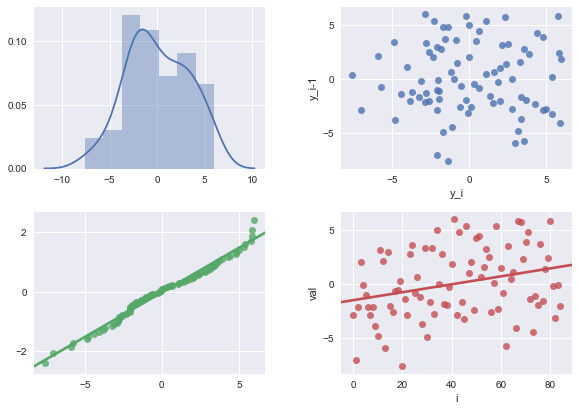

In [41]:
fourPlot(residuals)

## Wait! You had a fourPlot function and didn't tell me?

Side point: For things that you do a lot, put them in a "tool" file

Give them functions names

load up the file using:

`exec(open('useful.py').read())` (if your file is called useful.py)

## <font color="red">Q5: Calculate residuals for your ```writing``` regression and run fourPlot on them

In [42]:
# insert your code here

## Q's about residuals
* Are the residuals approximately normally distributed with a fixed location and scale? (QQ)
* Are there outliers?
* Is the fit adequate?
* Do the residuals suggest a better fit?

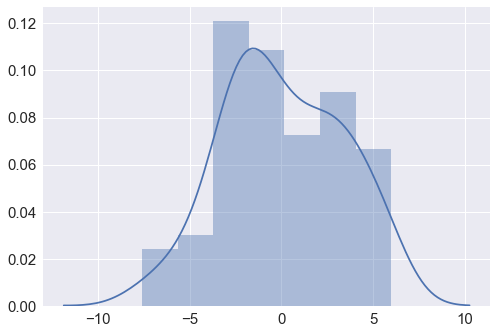

In [38]:
# Histogram
sns.distplot(residuals, kde=True); 

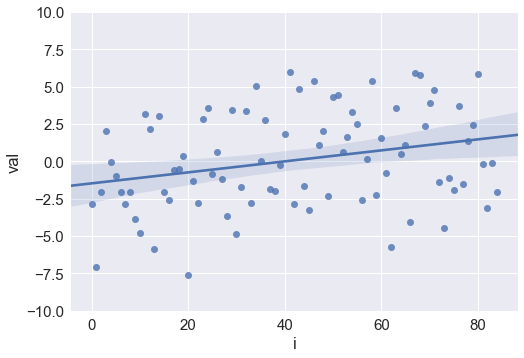

In [39]:
# Run sequence
ax = sns.regplot(np.arange(len(residuals)),residuals)
ax.set_ylim(-10,10)
ax.set_ylabel("val")
ax.set_xlabel("i")

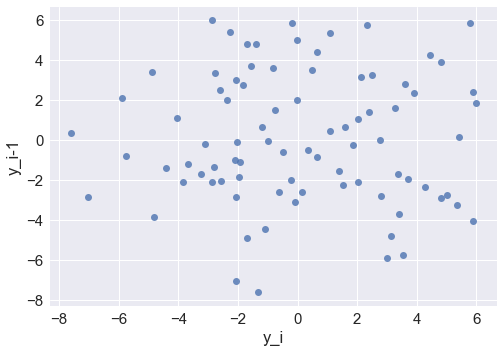

In [40]:
# Lag Plot
lag = residuals.copy()
lag = np.array(lag[:-1])
current = residuals[1:]
ax = sns.regplot(current,lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

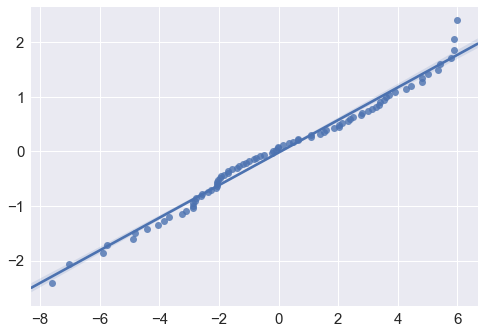

In [41]:
# QQ Plot
qntls, xr = stats.probplot(residuals, fit=False)
sns.regplot(xr,qntls)

## If you want lots more...

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model1 = smf.ols('group_size ~ neocortex_ratio', data=dunbar).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             group_size   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     7416.
Date:                Wed, 04 Oct 2017   Prob (F-statistic):           5.93e-83
Time:                        11:45:54   Log-Likelihood:                -216.62
No. Observations:                  85   AIC:                             437.2
Df Residuals:                      83   BIC:                             442.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2286      1.357     -0.905      0.368      -3.928       1.471
neocortex_ratio     1.0113      0.012     86.116      0.000       0.988       1.035
==============================================================================
Omnibus:                        6.637   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                2.762
Skew:                          -0.058   Prob(JB):                        0.251
Kurtosis:                       2.125   Cond. No.                         462.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regression supports prediction
(in case it wasn't clear)

Once I have y = mx + b, I can calculate any y given x

In [43]:
# monkey from space with big brain

bigBrainFriends = slope * 200 + intercept
bigBrainFriends

198.01671075550829

# Outliers and Leverage
* Outliers, Leverage, and Influence
* Techniques to determine
  * Cooks
  * DFITTS
  * DFBETA
* Ways to remove
  * Percentile
  * Other normalization
  * Median/MAD
  * Z-score

In [44]:
from io import StringIO

testdata = """x,y
11.7949,76.9231
20.2564,64.2308
26.1538,53.4615
13.3333,65.3846
20.7692,52.3077
28.7179,40
34.6154,31.1538
31.2821,44.6154
38.4615,33.0769
39.4872,25.7692
86.1538,65"""

testlev1 = pd.read_csv(StringIO(testdata))
testlev1

x        y
0   11.7949  76.9231
1   20.2564  64.2308
2   26.1538  53.4615
3   13.3333  65.3846
4   20.7692  52.3077
5   28.7179  40.0000
6   34.6154  31.1538
7   31.2821  44.6154
8   38.4615  33.0769
9   39.4872  25.7692
10  86.1538  65.0000

# Leverage point

Far away on the x-axis from the "mean" x of the other points

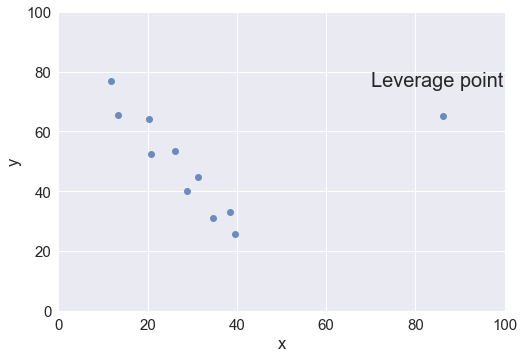

In [45]:
ax = sns.regplot(testlev1.x,testlev1.y,ci=0,fit_reg=False)
ax.set_ylim([0,100]);
ax.set_xlim([0,100]);
ax.text(70, 75, "Leverage point", ha ='left', fontsize = 20)

In [46]:
from io import StringIO

testdata = """x,y
8.7179,13.4615
15.8974,20
31.2821,33.0769
46.1538,36.5385
50.7692,45.7692
60.2564,56.1538
67.6923,52.6923
75.641,66.1538
82.0513,75.7692
87.1795,83.4615
67.9487,65.3846
38.4615,33.0769
24.1026,26.5385
37.1795,75.3846"""

testout1 = pd.read_csv(StringIO(testdata))
testout1

x        y
0    8.7179  13.4615
1   15.8974  20.0000
2   31.2821  33.0769
3   46.1538  36.5385
4   50.7692  45.7692
5   60.2564  56.1538
6   67.6923  52.6923
7   75.6410  66.1538
8   82.0513  75.7692
9   87.1795  83.4615
10  67.9487  65.3846
11  38.4615  33.0769
12  24.1026  26.5385
13  37.1795  75.3846

# Outlier
High (or low) on y-axis given distribution of other points

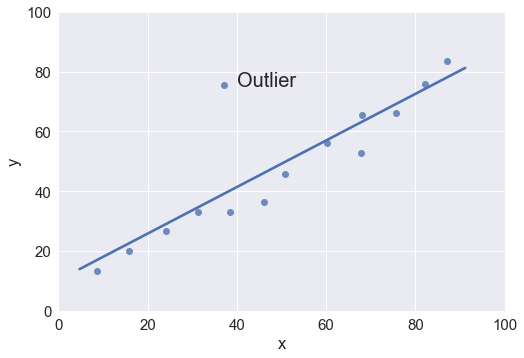

In [47]:
ax = sns.regplot(testout1.x,testout1.y,ci=0)
ax.set_ylim([0,100]);
ax.set_xlim([0,100]);
ax.text(40, 75, "Outlier", ha ='left', fontsize = 20)

# Influential Point

## A point that can change the model (e.g., regression) when it is present or removed

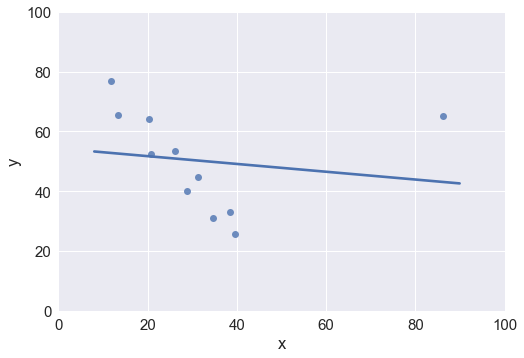

In [48]:
# original leverage point example
ax = sns.regplot(testlev1.x,testlev1.y,ci=0)
ax.set_ylim([0,100]);
ax.set_xlim([0,100]);

In [49]:
testNoLev1 = testlev1.loc[0:len(testlev1)-2]
testNoLev1

x        y
0  11.7949  76.9231
1  20.2564  64.2308
2  26.1538  53.4615
3  13.3333  65.3846
4  20.7692  52.3077
5  28.7179  40.0000
6  34.6154  31.1538
7  31.2821  44.6154
8  38.4615  33.0769
9  39.4872  25.7692

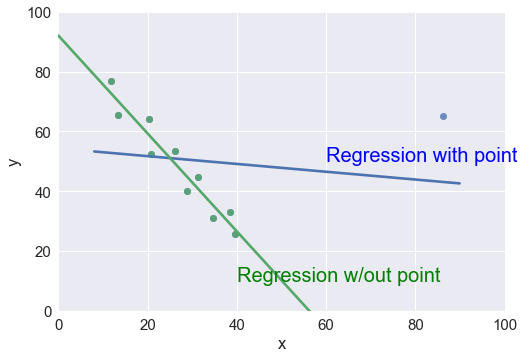

In [50]:
ax = sns.regplot(testlev1.x,testlev1.y,ci=0)
ax.set_ylim([0,100]);
ax.set_xlim([0,100]);
ax = sns.regplot(testNoLev1.x,testNoLev1.y,ci=0)
ax.text(40, 10, "Regression w/out point", ha ='left', fontsize = 20,color='g')
ax.text(60, 50, "Regression with point", ha ='left', fontsize = 20,color='b')

# Group question: Does a leverage point always have to be influential?



# Leverage point and/or influential

A leverage point *can* be influential as it is in the above case

But not always true --> Leverage point doesn't necessarily mean influential

In [51]:
testdata = """x,y
5.3846,78.4615
8.4615,77.3077
11.5385,72.6923
18.2051,73.8462
18.2051,68.4615
23.0769,67.6923
26.9231,65.3846
79.7436,40.7692"""

testlev2 = pd.read_csv(StringIO(testdata))

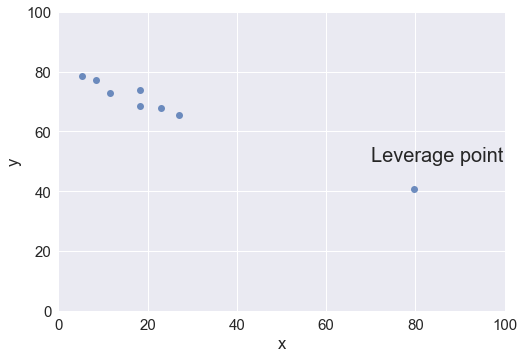

In [52]:
ax = sns.regplot(testlev2.x,testlev2.y,ci=0,fit_reg=False)
ax.set_ylim([0,100]);
ax.set_xlim([0,100]);
ax.text(70, 50, "Leverage point", ha ='left', fontsize = 20)

In [53]:
testNoLev2 = testlev2.loc[0:len(testlev2)-2]
testNoLev2

x        y
0   5.3846  78.4615
1   8.4615  77.3077
2  11.5385  72.6923
3  18.2051  73.8462
4  18.2051  68.4615
5  23.0769  67.6923
6  26.9231  65.3846

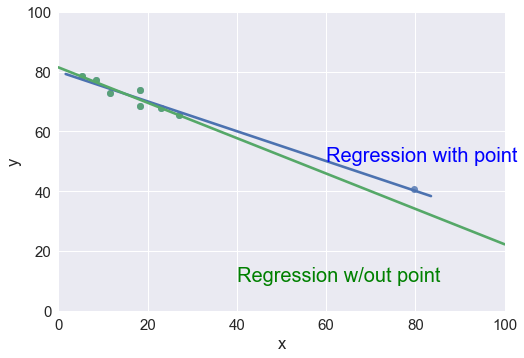

In [54]:
ax = sns.regplot(testlev2.x,testlev2.y,ci=0)
ax.set_ylim([0,100]);
ax.set_xlim([0,100]);
ax = sns.regplot(testNoLev2.x,testNoLev2.y,ci=0)
ax.text(40, 10, "Regression w/out point", ha ='left', fontsize = 20,color='g')
ax.text(60, 50, "Regression with point", ha ='left', fontsize = 20,color='b')

# Group question: Can an outlier be influential?

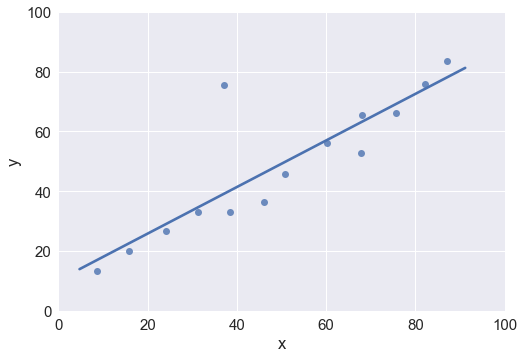

In [55]:
ax = sns.regplot(testout1.x,testout1.y,ci=0)
ax.set_ylim([0,100]);
ax.set_xlim([0,100]);

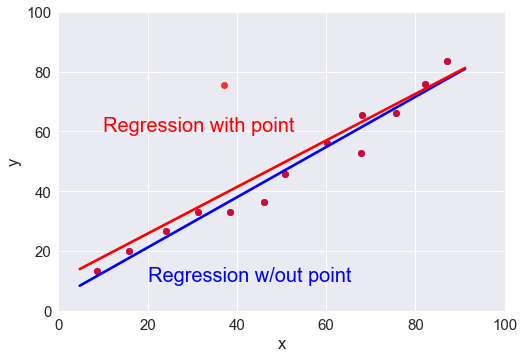

In [56]:
testdfCleanO = testout1.loc[0:len(testout1)-2]
ax = sns.regplot(testdfCleanO.x,testdfCleanO.y,ci=0,color="b")
ax = sns.regplot(testout1.x,testout1.y,ci=0,color="r")
ax.set_ylim([0,100]);
ax.set_xlim([0,100]);
ax.text(10, 60, "Regression with point", ha ='left', fontsize = 20,color='r')
ax.text(20, 10, "Regression w/out point", ha ='left', fontsize = 20,color='b')

# Outliers tend not to be influential

## Unless they're way off (above or below)

# To sum up...

* Leverage points
  * A point that is very far on the x-axis (left or right) from the mean/median $x$ of the rest of the points
* Outlier
  * A point that is very far on the y-axis (up or down) from the mean/median $y$ of the rest of the points
* Influential points
  * Points that change the regression/model significantly by being included
* Leverage points can be influential (but not necessary)
* Outliers points tend not to be influential


# To sum up...

* Influential points will increase the residuals of all the other points
* Outliers tend to only increase their own residual
* Both can create problems

# That's nice but...

## ... what about more than one point?

* Sometimes outliers/leverage/influence are obvious
* In any dataset:
 * multiple points can be outliers/leverage/influetial
 * each can be influential in different amounts

# We want to measure influence of all points

* DFFITS
* Cook's

In [57]:
from io import StringIO

TESTDATA=StringIO("""X1,Y1,X2,Y2,X3,Y3,X4,Y4
10,8.04,10,9.14,10,7.46,8,6.58
8,6.95,8,8.14,8,6.77,8,5.76
13,7.58,13,8.74,13,12.74,8,7.71
9,8.81,9,8.77,9,7.11,8,8.84
11,8.33,11,9.26,11,7.81,8,8.47
14,9.96,14,8.1,14,8.84,8,7.04
6,7.24,6,6.13,6,6.08,8,5.25
4,4.26,4,3.1,4,5.39,19,12.5
12,10.84,12,9.13,12,8.15,8,5.56
7,4.82,7,7.26,7,6.42,8,7.91
5,5.68,5,4.74,5,5.73,8,6.89""")

anscombe = pd.DataFrame.from_csv(TESTDATA, index_col=None)


# 3rd Anscombe chart
## Is this an outlier or leverage point?
## Is it influential?

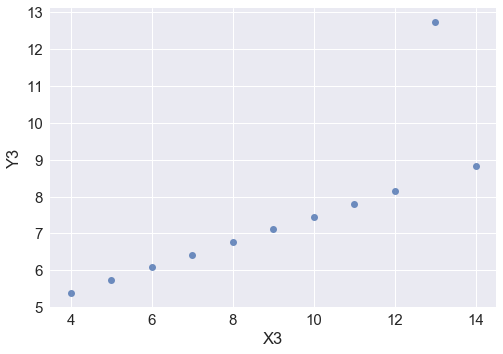

In [58]:
sns.regplot(anscombe.X3,anscombe.Y3,ci=0,fit_reg=False)

In [59]:
slope, intercept, r, p, serr = stats.linregress(anscombe.X3,
                                                anscombe.Y3)
print("slope=",slope)
print("intercept=",intercept)
print("r value=",r)
print("p value=",p)
print("standard error",serr)

slope= 0.499727272727
intercept= 3.00245454545
r value= 0.81628673949
p value= 0.00217630527923
standard error 0.117877662221


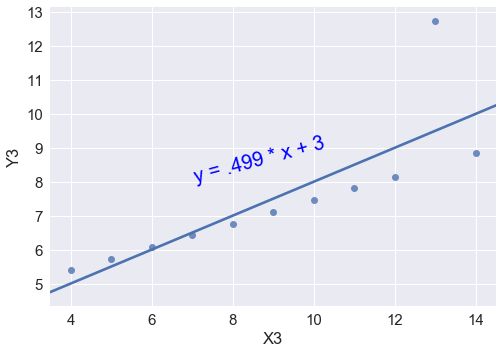

In [60]:
# basically this
ax = sns.regplot(anscombe.X3,anscombe.Y3,ci=0)
ax.text(7, 9, "y = .499 * x + 3", ha ='left', fontsize = 20,color='b',rotation=15)

In [61]:
model1 = smf.ols('Y3 ~ X3', data=anscombe).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y3   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Wed, 04 Oct 2017   Prob (F-statistic):            0.00218
Time:                        11:46:53   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0025      1.124      2.670      0.026       0.459       5.546
X3             0.4997      0.118      4.239      0.002       0.233       0.766
==============================================================================
Omnibus:                       19.540   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.478
Skew:                           2.041   Prob(JB):                      0.00118
Kurtosis:                       6.571   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Perform influence test
infl1 = model1.get_influence()
infl_stats = infl1.summary_frame()
infl_stats.head()

dfb_Intercept        dfb_X3   cooks_d      dffits  dffits_internal  \
0      -0.004626 -4.412673e-02  0.011765   -0.146352        -0.153392   
1      -0.037133  1.864368e-02  0.002141   -0.061834        -0.065444   
2    -357.909597  5.252677e+02  1.392849  669.587544         1.669041   
3      -0.032900  1.786857e-15  0.005473   -0.099246        -0.104624   
4       0.049155 -1.172274e-01  0.025984   -0.219312        -0.227964   

   hat_diag  standard_resid  student_resid  
0  0.100000       -0.460177      -0.439055  
1  0.100000       -0.196333      -0.185502  
2  0.236364        2.999992    1203.539464  
3  0.090909       -0.330851      -0.313844  
4  0.127273       -0.596951      -0.574295

## <font color="red">Q6: Perform an influence test on your writing regression.  Can you identify any outliers?

In [63]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [62]:
# insert your code on the next line to create a model in the form DEPVAR ~ INDEPVAR
modelw = smf.ols('PUT YOUR MODEL HERE', data=writing).fit()
modelw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nondom   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     2.009
Date:                Wed, 04 Oct 2017   Prob (F-statistic):              0.206
Time:                        11:31:59   Log-Likelihood:                -24.515
No. Observations:                   8   AIC:                             53.03
Df Residuals:                       6   BIC:                             53.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3838      5.205      1.034      0.341      -7.353      18.121
dom            1.4576      1.028      1.417      0.206      -1.059       3.974
==============================================================================
Omnibus:                        2.334   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.311   Jarque-Bera (JB):                0.879
Skew:                          -0.296   Prob(JB):                        0.644
Kurtosis:                       1.488   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# now run your influence test and look at the results
inflw = modelw.get_influence()
infwl_stats = inflw.summary_frame()
infwl_stats

dfb_Intercept   dfb_dom   cooks_d    dffits  dffits_internal  hat_diag  \
0      -0.189306  0.084061  0.045394 -0.289247        -0.301312  0.136531   
1       0.384200 -0.684303  0.351723 -0.905428        -0.838717  0.291513   
2       0.001735 -0.005681  0.000063 -0.010226        -0.011202  0.180812   
3      -0.734951  0.514524  0.268300 -0.830212        -0.732530  0.202952   
4       0.741237 -0.647706  0.301102  0.744788         0.776019  0.512915   
5       0.436776 -0.305778  0.122615  0.493389         0.495207  0.202952   
6      -0.054348  0.178016  0.056356  0.320413         0.335726  0.180812   
7      -0.370269  0.659492  0.333445  0.872598         0.816633  0.291513   

   standard_resid  student_resid  
0       -0.757745      -0.727403  
1       -1.307533      -1.411532  
2       -0.023843      -0.021766  
3       -1.451680      -1.645260  
4        0.756226       0.725792  
5        0.981369       0.977766  
6        0.714602       0.682007  
7        1.273105       1.360353

<font color="red">insert your answer here</font>

## <font color="red">REMEMBER TO SUBMIT your Jupyter Notebook (to Lab 5.2) via Canvas before you leave class today!

# CLASS ENDS HERE -- THE FOLLOWING MATERIAL IS INCLUDED IN CASE WE HAVE EXTRA TIME AND ENERGY

# DFBETA

* Most 'influence' diagnostics work similarly
* Measure how much the model is likely to (or would) move without the point 

# DFBETA
* Calculate the model (e.g., $slope_{all points}$, $intercept_{all points}$)
  * For each point ($x_i$)
     * remove point
     * Calculate the model again (e.g., $slope_{all points - x_i}$, $intercept_{all points - x_i}$)
     * Calculate the difference $slope_{all points} - slope_{all points - x_i}$
  * there's a column for each parameter dfb_Intecept and dfb_X3 (X3 = slope)


In [64]:
# most influential by DFBETA on Intercept
infl_stats[['dfb_Intercept','dfb_X3']].sort_values('dfb_Intercept').head()

dfb_Intercept        dfb_X3
2    -357.909597  5.252677e+02
1      -0.037133  1.864368e-02
3      -0.032900  1.786857e-15
9      -0.019702  1.342485e-02
0      -0.004626 -4.412673e-02

# Cook's Distance

* Remember, our regression is a prediction
 * y = mx + b
 * given some x, calculate y
* Cook's Distance measures
 * If I generate model with all the data:
   * $y_{original} = m_{original} \times x + b_{original}$
 * And I generate the model without some point $i$:
   * $y_{original-i} = m_{original - i} \times x + b_{original - i}$
 * What's the difference between $y_{original}$ and $y_{original - i}$
   * (for all points $j$ in my dataset)

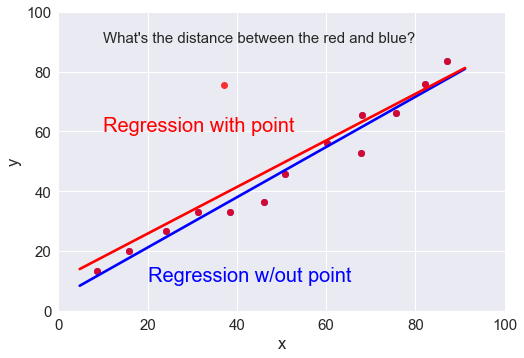

In [65]:
ax = sns.regplot(testdfCleanO.x,testdfCleanO.y,ci=0,color="b")
ax = sns.regplot(testout1.x,testout1.y,ci=0,color="r")
ax.set_ylim([0,100]);
ax.set_xlim([0,100]);
ax.text(10, 60, "Regression with point", ha ='left', fontsize = 20,color='r')
ax.text(20, 10, "Regression w/out point", ha ='left', fontsize = 20,color='b')
ax.text(10, 90, "What's the distance between the red and blue?",fontsize=15)

# Cook's Distance

$$ cooks_i = \frac{\sum_j{(y_{j,original} - y_{j,original-i})^2}}{p \times MSE} $$

* p is the number of model parameters (e.g., 1 in a simple linear model)
* MSE is Mean Squared Error (how bad our prediction is in general)

if $cooks_i > 4/n$, we treat point i as influential

In [66]:
# top outliers by cooks
infl_stats.sort_values('cooks_d',ascending=False).head()[['cooks_d']]

cooks_d
2  1.392849
5  0.300571
8  0.059536
7  0.033817
4  0.025984

# DFFITS
* Same relative deal as Cook's
* distance is measured by the approximate number of standard deviations.

$$ DFFITS_i = \frac{y_{i,original} - y_{i,original-i}}{\sqrt{MSE \times h_{ii}}} $$

In [67]:
# top outliers by dffits
infl_stats.sort_values('dffits',ascending=False).head()[['dffits']]

dffits
2   669.587544
7     0.247192
10    0.111416
6     0.030344
9    -0.025116

## Visualizing influence

* Residual-Leverage Plot
  * helpful for identifying leverage points on the extremes of the X-axis
  * outliers on the extremes of the Y-axis.
  * influence points by the size of the points (Cook's distance or DFFITS).

*Notice that the influence points are labeled with their indexes.

X1    Y1  X2    Y2  X3     Y3  X4    Y4
2  13  7.58  13  8.74  13  12.74   8  7.71

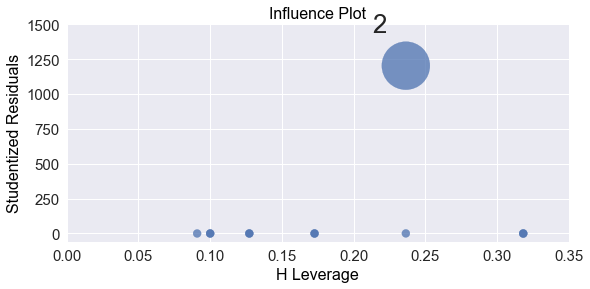

In [68]:
# Influence plot of Studentized Residual vs. Leverage.
fig, ax = plt.subplots(figsize=(9,4))
fig = sm.graphics.influence_plot(model1, ax=ax, criterion='dffits')
ax.set_xlim(0, 0.35)
ax.set_ylim(-60,1500)
anscombe.loc[[2]]  # find the influentual row

(-60, 1500)

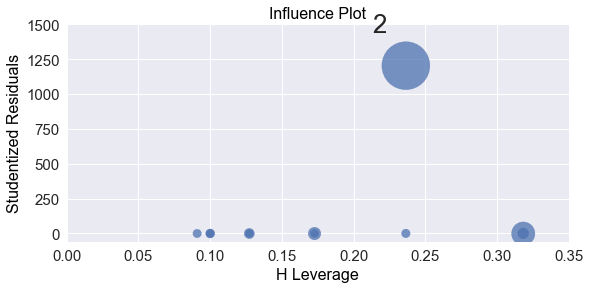

In [69]:
# Influence plot of Studentized Residual vs. Leverage.
fig, ax = plt.subplots(figsize=(9,4))
fig = sm.graphics.influence_plot(model1, ax=ax, criterion='cooks_d')
ax.set_xlim(0, 0.35)
ax.set_ylim(-60,1500)

# Leverage vs. Squared-Residual plot

Similar to the above plot, except the residuals are squared, and X and Y axes are swapped, and the nodes are not sized by influence.

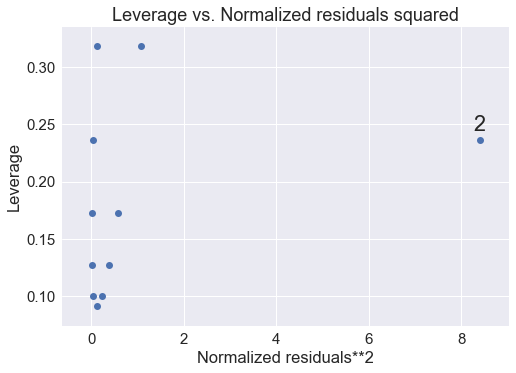

In [70]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_leverage_resid2(model1, ax=ax)

# Regression Fit Plot
Plot fit against one regressor. This creates one graph with the scatterplot of observed values compared to fitted values.

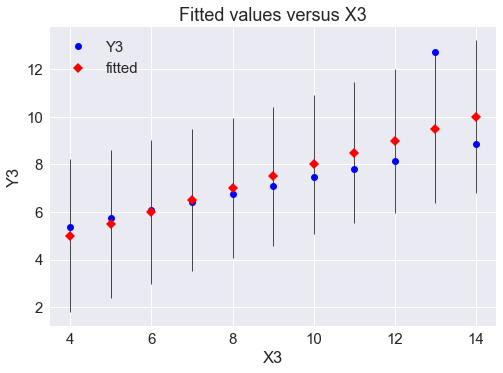

In [71]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model1, 'X3', ax=ax)

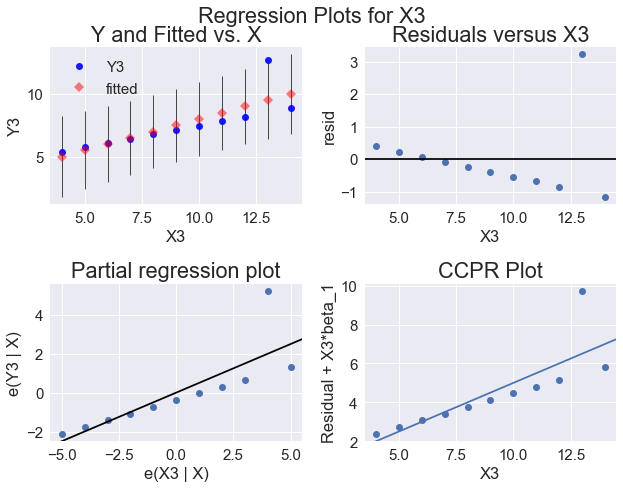

In [72]:
# Other diagnostics available, but that's beyond this course
fig = plt.figure(figsize=(9,7))
fig = sm.graphics.plot_regress_exog(model1, 'X3', fig=fig)

# Important: Models can be more sophisticated

We've only regressed (linear, simple) X against Y.

Library supports more complicted modelling 

# Removing Outliers
* Univariate
  * remove
  * smooth
* Multivariate
  * Univariate on each
  * Remove based on model fit

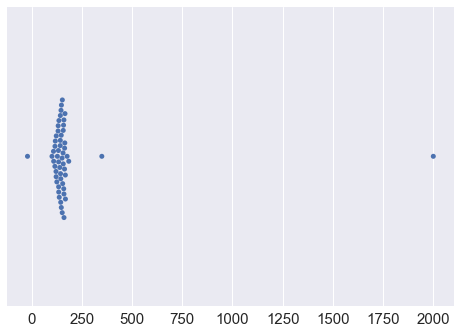

In [73]:
a = np.random.standard_normal(50)*20+150
aOutliers = np.insert(a,0,[2000.,350.,-20])
sns.swarmplot(aOutliers)

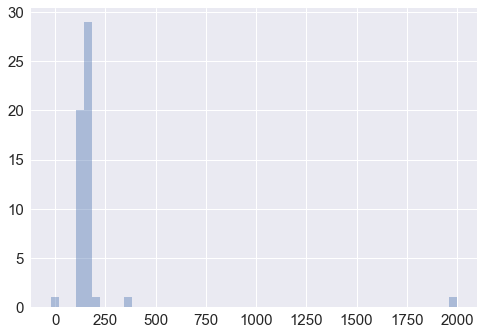

In [74]:
sns.distplot(aOutliers,kde=False)

# Stategy 1
## Use robust statistics

In [75]:
print("mean w/out outliers = ",np.mean(a))
print("mean with outliers = ",np.mean(aOutliers))
print("median w/out outliers = ",np.median(a))
print("median with outliers = ",np.median(aOutliers))

mean w/out outliers =  144.503989062
mean with outliers =  180.286782134
median w/out outliers =  145.597233272
median with outliers =  145.870182304


# Standard Deviation

$$ {variance} = \frac{1}{n} \sum{(x_i - \mu)^2}$$

where, $\mu$ is the mean

$$ mu = \frac{1}{n} \sum{x_i}$$

and standard deviation is $\sqrt{{variance}}$

## Not super robust

In [76]:
print("std w/out outliers = ",np.std(a))
print("std with outliers = ",np.std(aOutliers))

std w/out outliers =  18.5424614817
std with outliers =  255.560247469


# Median Absolute Deviation

$$ {MAD} = median(|X_i-median(X)|) $$

Distance of each point from median, and the median of that

In [77]:
# available in statsmodels.robust, but we'll build it ourselves
def mad(x):
    meds = np.abs(x - np.median(x))
    return(np.median(meds))

print("std w/out outliers = ",np.std(a))
print("std with outliers = ",np.std(aOutliers))
print("mad w/out outliers = ",mad(a))
print("mad with outliers = ",mad(aOutliers))


std w/out outliers =  18.5424614817
std with outliers =  255.560247469
mad w/out outliers =  13.1176616572
mad with outliers =  13.6428301991


# Strategy 2

Cut out some data, e.g., keep 95 percentile

Thoughts? When is this a good idea? or isn't?

In [78]:
print("2.5 percentile cutoff = ", 
      np.percentile(aOutliers,2.5))
print("97.5 percentile cutoff = ", 
      np.percentile(aOutliers,97.5))
b = aOutliers[(aOutliers > np.percentile(aOutliers,2.5)) & 
              (aOutliers < np.percentile(aOutliers,97.5))]

2.5 percentile cutoff =  104.172368255
97.5 percentile cutoff =  300.603714486


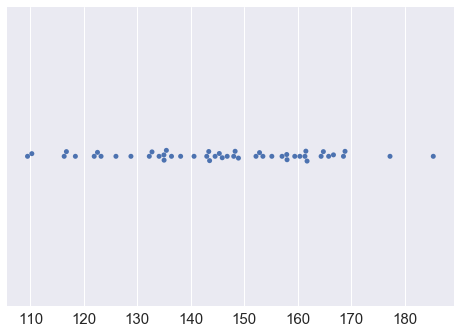

In [79]:
sns.swarmplot(b)

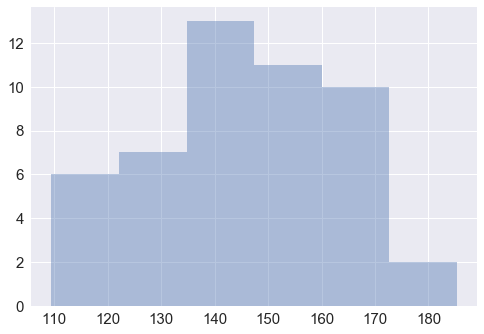

In [80]:
sns.distplot(b,kde=False)

In [81]:
print("mean before we added outliers=",np.mean(a))
print("mean w/outliers= ",np.mean(aOutliers))
print("mean after we removed them (95%)",np.mean(b))

mean before we added outliers= 144.503989062
mean w/outliers=  180.286782134
mean after we removed them (95%) 145.373250652


# Normalization

* Sometimes it's not a matter of outliers
  * Data is not normally distributed
  * Points in the tail impact our stats
* Sometimes we want to restrict our ranges
  * [-1 to 1], [0 to 1]
  * Example: "camera score"
    * camera weight + megapixels
    * megapixels >> camera weight

# Normalization 1: Normalize by max

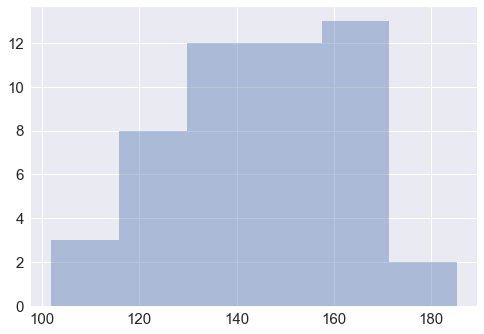

In [82]:
ax = sns.distplot(a,kde=False)

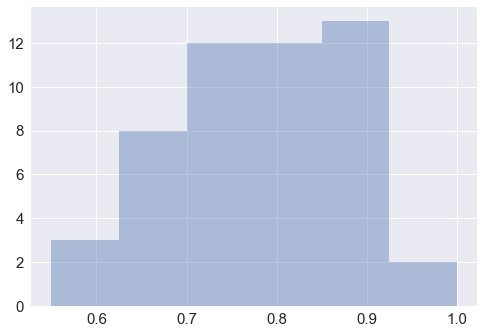

In [83]:
norm1 = a/np.max(a)
ax = sns.distplot(norm1,kde=False)
# property: max in original has a value of 1
# min in original will be min divided by max

# Normalization 2: Normalize by sum

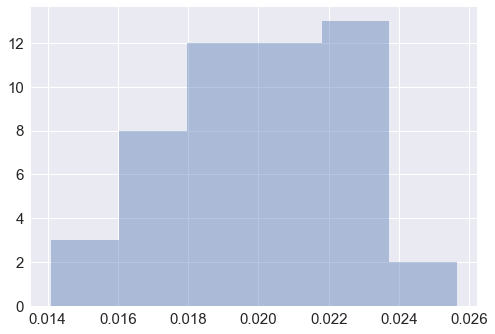

In [84]:
norm2 = a/np.sum(a)
ax = sns.distplot(norm2,kde=False)
# property: max in original has a value of max/sum
# min in original will be min/sum

# Normalize by mapping

![](dtor.png 'dtor')

# Normalization 3/4: Normalize by mapping
Map domain 
* $[min_{original},max_{original}]$ to range $[min_{domain},max_{domain}]$

If we want domain to be mapped to range [0,1]:
* Make data start at 0: $x_i - min_{original}$ 
* Make data start at 0 and end at 1: 
  * $(x_i - min_{original})/(max_{original}-min_{original})$ 
* If we want data to go to [A,B]:
  * $A + (B-A) \times (x_i - min_{original})/(max_{original}-min_{original})$ 

from: 101.910171114 - 185.345714952
to: 0.0 - 1.0


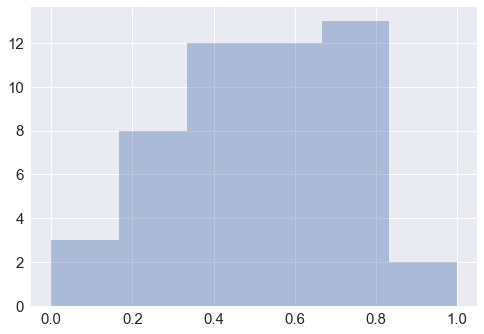

In [85]:
norm3 = (a - np.min(a))/(np.max(a)-np.min(a))
ax = sns.distplot(norm3,kde=False)
print("from:",np.min(a),"-",np.max(a))
print("to:",np.min(norm3),"-",np.max(norm3))

from: 101.910171114 - 185.345714952
to: 5.0 - 100.0


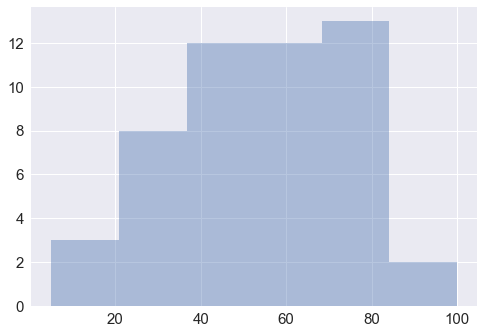

In [86]:
# if we want data to go from 5 to 100 
# (min should be 5, max should be 100)
A = 5
B = 100
norm4 = A + (a - np.min(a))/(np.max(a)-np.min(a)) * (B - A)
# or: norm4 = A + norm3 * (B-A)
ax = sns.distplot(norm4,kde=False)
print("from:",np.min(a),"-",np.max(a))
print("to:",np.min(norm4),"-",np.max(norm4))

# Normalization 5: Normalization by log

Sometimes we take the log (especially for long tail distributions)

* other variants possible

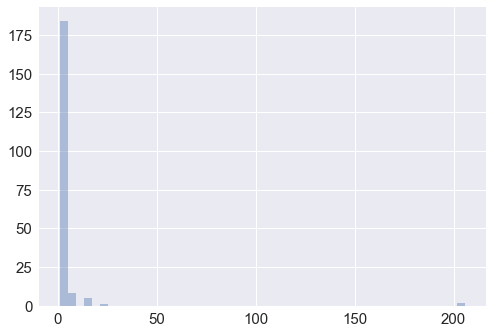

In [87]:
zipf = np.random.zipf(2,200)
sns.distplot(zipf,kde=False)

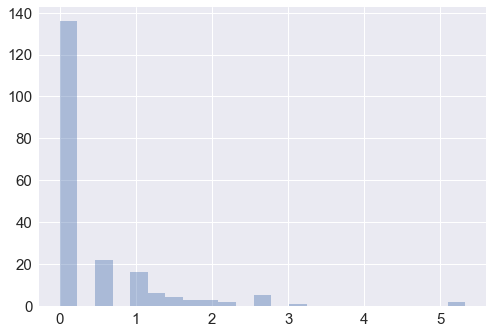

In [88]:
norm5 = np.log(zipf)
sns.distplot(norm5,kde=False)

# Normalization 6: Z-score

Also called standard score, standardizing, etc.

* Make it look like a real normal (standard normal... mean of 0, stdev of 1)

$$ \frac{x_i - mean(X)}{std(X)}$$



# Z-score

* Useful for comparing apples to apples (can do this to all your variables)
* Some stats assume data comes in this form
* Sometimes easier to interpret
* BUT: original data needed to have looked normal to start with

mean =  144.503989062
std =  18.5424614817


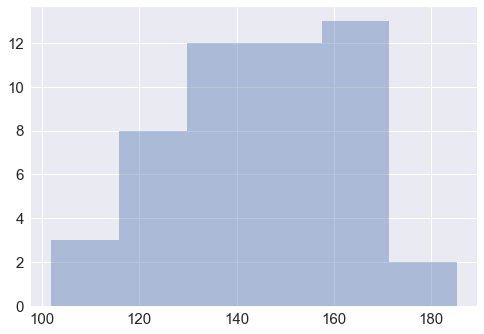

In [89]:
print("mean = ",np.mean(a))
print("std = ",np.std(a))
ax = sns.distplot(a,kde=False)

mean =  -7.30526750203e-16
std =  1.0


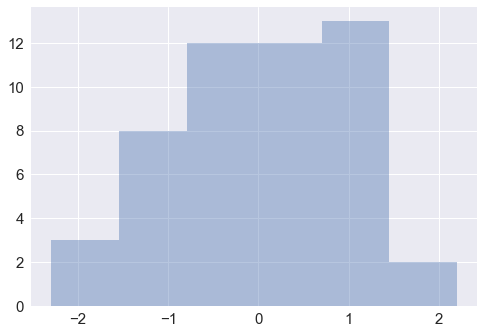

In [90]:
norm6 = (a - np.mean(a))/np.std(a)
print("mean = ",np.mean(norm6))
print("std = ",np.std(norm6))
ax = sns.distplot(norm6,kde=False)

# With models...

* Can transform each variable by z-score 
 * gets rid of some craziness
* Can apply other transformations or data removal on each variable
 * *if justified*
* Can use model stats to remove outliers

# Model based thresholds

* DFBETA: 
 * if $DFBETA_i > 2/\sqrt{n}$, $i$ is influential
 * if $2/\sqrt{n} > 1$, use 1
* Cook's Distance:
 * if $COOKS_i > 4/n$, $i$ is influential
 * if $4/n > 1$, use 1


# Model based thresholds
* DFFITS:
 * if $DFITTS_i > 2*\sqrt{p/n}$, $i$ is inluential ($p$ is # parameters)
* Leverage:
 * if $Leverage_i > 3p/n$, $i$ is influential
 * If the threshold is smaller than 0.99, use 0.99
 * Leverage is always between [0, 1].

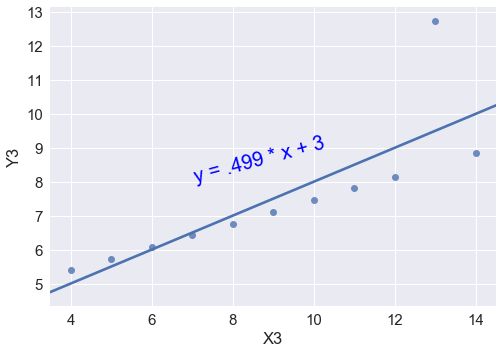

In [91]:
# basically this
ax = sns.regplot(anscombe.X3,anscombe.Y3,ci=0)
ax.text(7, 9, "y = .499 * x + 3", ha ='left', fontsize = 20,color='b',rotation=15)

In [92]:
# example to find outliers
p = 1
n = len(anscombe)
threshold = 2*np.sqrt(p/n)
# select those that are highly influential
infl_stats[infl_stats.dffits > threshold]

dfb_Intercept      dfb_X3   cooks_d      dffits  dffits_internal  hat_diag  \
2    -357.909597  525.267685  1.392849  669.587544         1.669041  0.236364   

   standard_resid  student_resid  
2        2.999992    1203.539464

# Summary
* Various kinds of "outliers"
 * outliers, leverage points, influential points
* Influence measured by impact on model
* Outliers/data can be smooth in various ways
* Outliers can be removed in various ways
* Remember: 
 * Should be able to justify your decisions
 * Can't just drop data because your model doesn't work well
 
 ## <font color="red">REMEMBER TO SUBMIT your Jupyter Notebook (to Lab 5.2) via Canvas before you leave class today!